In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')
import os

Import dataset
Shape
Viewing first Five Rows

In [2]:
df =pd.read_csv(r"C:\Users\kelvin\OneDrive\Desktop\DataScience\credit_risk_dataset_training.csv")
print(df.shape)
df.head()

(22850, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3


In [3]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              613
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2147
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

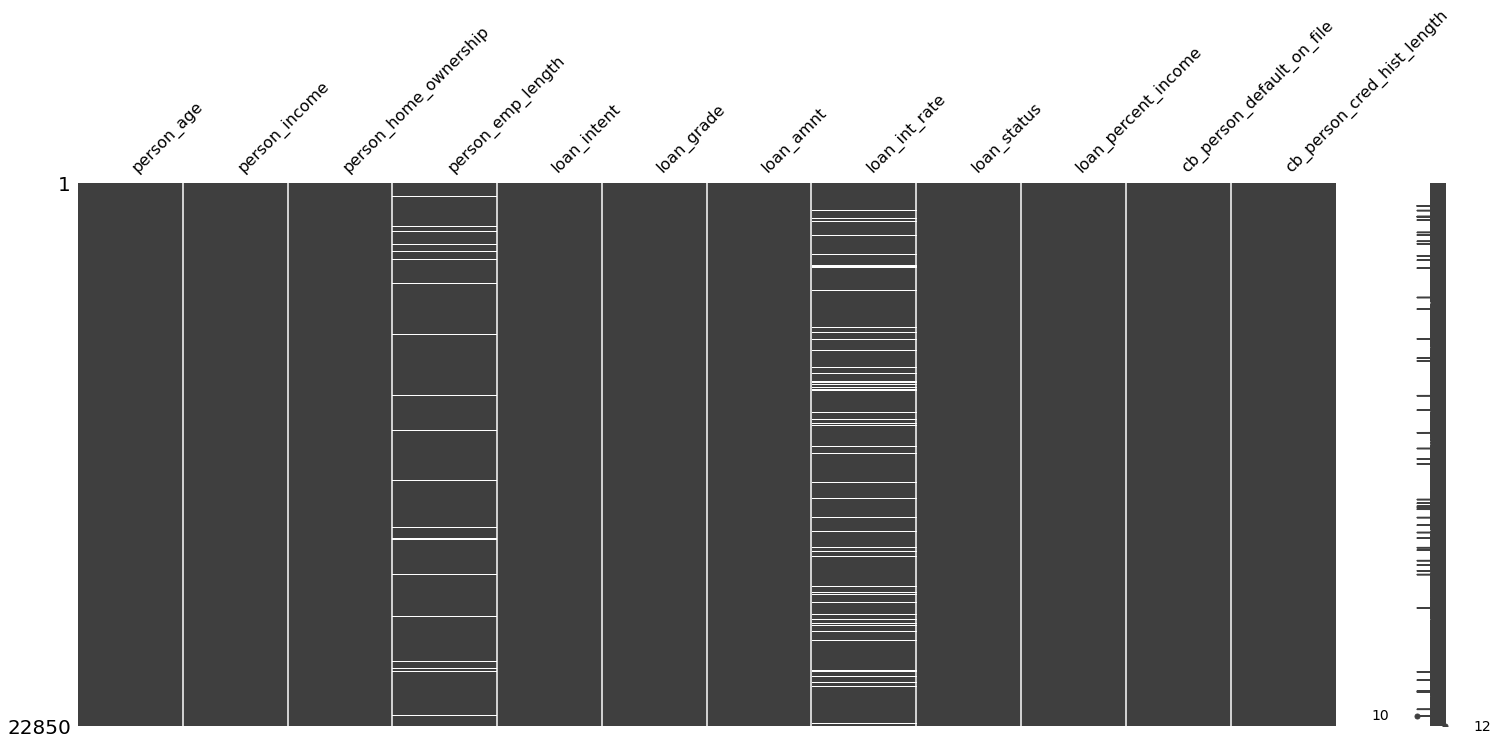

In [4]:
import missingno  as msn
msn.matrix(df);

In [5]:
def clean_column(cols):
    avg = cols.mean()
    return cols.fillna(avg)

df_clean = df.transform(clean_column)

In [6]:
df_clean.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [7]:
df_clean.select_dtypes('number').describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,22850.000000,2.285000e+04,22850.000000,22850.000000,22850.000000,22850.000000,22850.000000,22850.000000
mean,27.717812,6.604363e+04,4.800018,9595.500000,11.014324,0.220306,0.170243,5.801400
std,6.327822,6.423370e+04,4.056851,6327.603663,3.087864,0.414462,0.106557,4.050767
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.014324,0.000000,0.150000,4.000000
75%,30.000000,7.939500e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.780000,30.000000


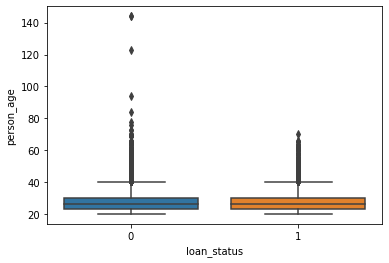

In [8]:
sns.boxplot(x = "loan_status",y = "person_age", data=df_clean);

In [9]:
print('Number of Outliers')
print(df_clean['person_age'].between(0,100).value_counts())
print('------------------------------------------------------------------------------------------------------------------------')
print('Viewing all dataset with Outliers')
df_clean[df_clean['person_age']>100]


Number of Outliers
True     22847
False        3
Name: person_age, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Viewing all dataset with Outliers


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
138,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2
514,123,78000,RENT,7.0,VENTURE,B,20000,11.014324,0,0.26,N,4
22646,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.730000,0,0.00,N,25


In [10]:
upper_q =df_clean['person_age'].quantile(0.999879)
lower_q = df_clean['person_age'].quantile(0.0001)
df_clean[df_clean['person_age'].between(lower_q,upper_q)]

dfclean = df_clean[df_clean['person_age'].between(lower_q,upper_q)]
dfclean.shape

(22847, 12)

# Data Exploration

In [ ]:
# df_pie=dfclean.set_index('')
plot = dfclean.plot.pie(y='loan_status', figsize=(5, 20))
plot;

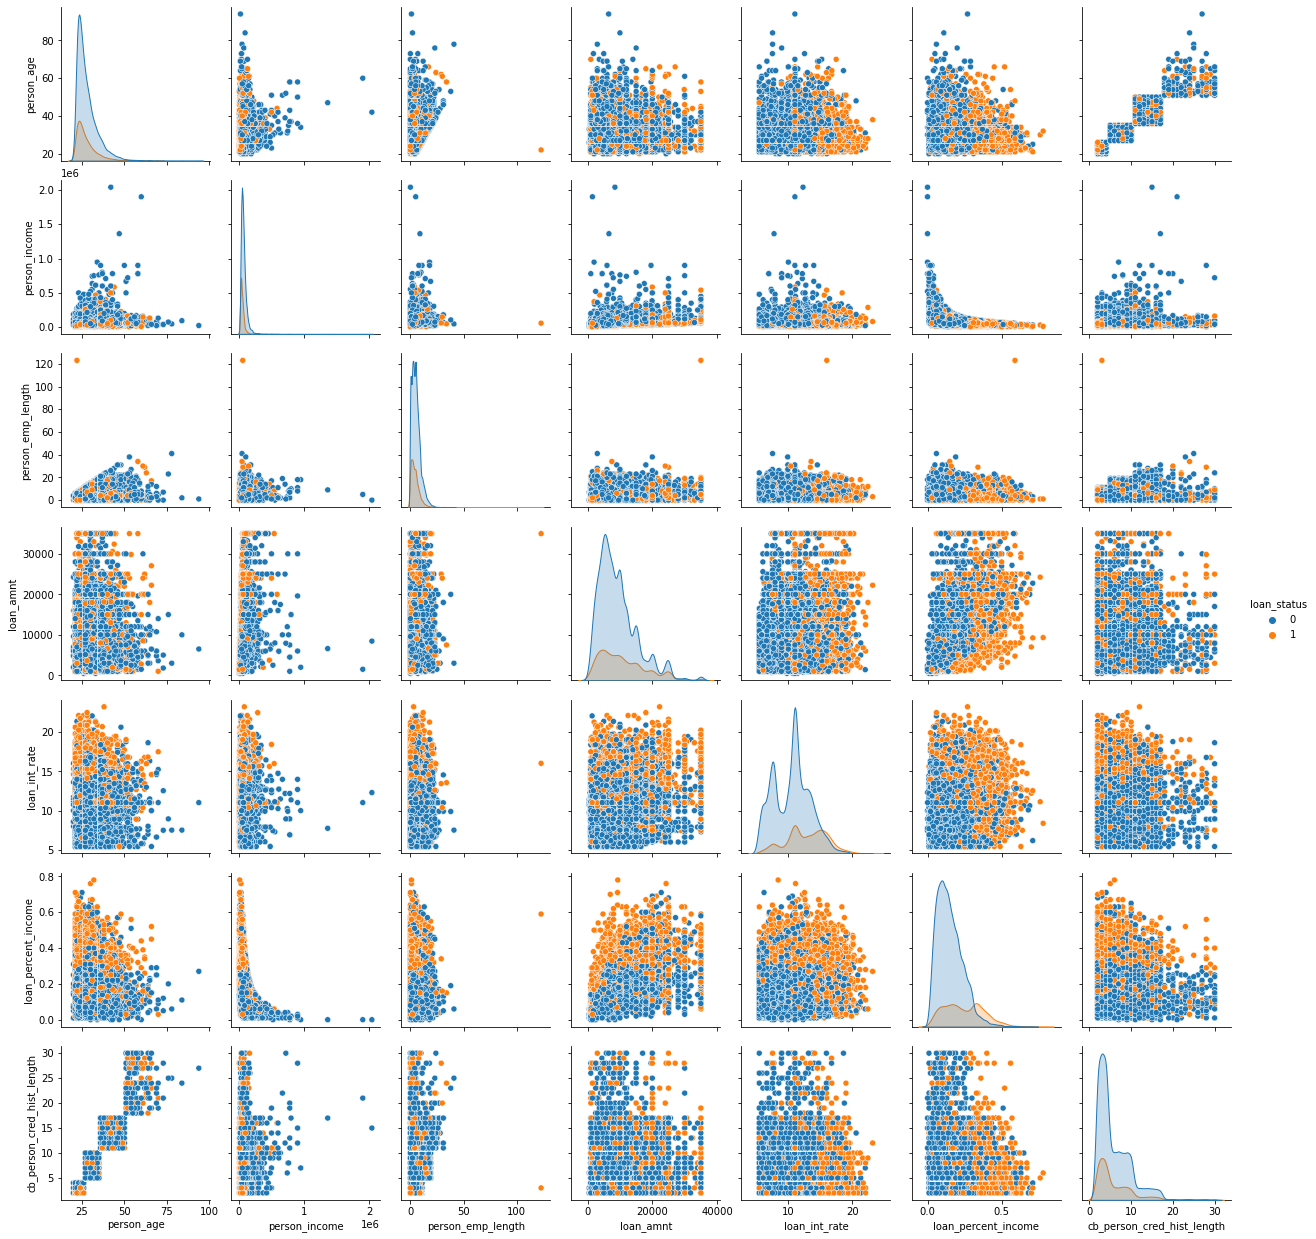

In [14]:
sns.pairplot(dfclean.select_dtypes('number'),hue = 'loan_status');